# Probleme de clasificare <img src="images/binClassification.png" width="150">

## Obiective
* rezolvarea unei probleme de clasificare binara
* rezolvarea unei probleme de clasificare multi-clasa redusa la mai multe probleme de clasificare bianra (*one vs. all*)
* folosirea unor algoritmi liniari de regresie logistica (folosirea functie $sigmoid$)
* normalizarea datelor (atributelor datelor)

## Cuvinte cheie:
* date de antrenare si date de testare 
* atribute/catacteristici ale datelor
* etichete ale datelor
* normalizare date 
* model de clasificare liniar
* acuratetea, precizia si rapelul clasificarii


## Aspecte teoretice
Problemele de clasificare sunt asemanatoare celor de regresie (pe baza unor caracteristici a datelor se doreste prezicearea unor valori asociate acestor date), doar ca $outputurile$ sunt de tip discrete (etichete ale calselor din care face parte fiecare data de intrare).

### Exemple de probleme de clasificare:
* etichetarea unui mesaj ca $spam$ sau $normal$ (clasificare binara)
* etichetarea unei tumori ca $benigna$ sau $maligna$ (clasificare binara)
* etichetarea unei fete ca $vesela$, $trista$ sau $furioasa$ (clasificare multi-clasa)

### Formalizare problema de clasificare binara:

* datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_3)$) si $eticheta$ ($label \in \{0, 1\}$)
* modelul (liniar) de discriminare intre cele 2 clase: $y = f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$ (atentie, $y$ va fi un numar real, nu o eticheta)
* clasificatorul, adica modelul de predictie (asociaza o eticheta valorii reale calculata cu modelul de discriminare): $label = h(x, w) = transformare(f(x, w))$

### Algoritm de clasificare (binara)

**Antrenare** 

> Input: un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., trainDataSize\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (poate fi 0 sau 1 - clasificare binara)

> Output: un model de discriminare intre cele 2 clase (adica valorile optime ale coeficientilor $w$ din ecuatia de regresie $f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$)

> Algoritm: 
* metoda celor mai mici patrate ($Least Square$)
* $Gradient Descent$

> in care valoarea prezisa de discriminator este transformata in $[0, 1]$ ($y_{computed} = sigmoid(f(x,w))$).

**Testare** 

> Input: un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: eticheta prezisa pentru exemplul $x_{new}$

> Algoritm:
Folosirea discriminantului invatat (a coeficientilor), a transformatei de tip sigmoid si a unui prag ($\Theta$): 
$$label = \left\{\begin{array}{lr}    0, & sigmoid(f(x_{new}, w)) < \Theta\\    1, & altfel \end{array} \right.$$

### Evaluarea performantei clasificatorului (a se vedea materialele din laboratorul 6)

* acuratetea 
* precizia
* rapelul 

### Formalizare problema de clasificare multiclasa - abordarea *one versus all*: <img src="images\multiclass.png" width="200">

**One vs. all** provides a way to leverage binary classification. Given a classification problem with $noClasses$ possible solutions, a *one-vs.-all* solution consists of $noClasses$ separate binary classifiers—one binary classifier for each possible outcome. During training, the model runs through a sequence of binary classifiers, training each to answer a separate classification question. For example, given five possible classes (apple, bear, candy, dog, egg) and a picture of a dog, five different recognizers might be trained, four seeing the image as a negative example (not a dog) and one seeing the image as a positive example (a dog). That is:
* Is this image an apple? No.
* Is this image a bear? No.
* Is this image candy? No.
* Is this image a dog? Yes.
* Is this image an egg? No.

This approach is fairly reasonable when the total number of classes is small, but becomes increasingly inefficient as the number of classes rises

* datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_3)$) si $eticheta$ ($label \in \{1, 2, 3, ..., noClasses\}$)
* se transforma problema in $noClasses$ probleme de clasificare binara
    - de ex., prima problema va fi formata din exemplele din clasa cu eticheta 1 si toate celelalte exemplele (1 versus restul)
    - a doua problema va fi formata din exemplele din clasa cu eticheta 2 si toate celelalte exemplele (2 versus restul)
* se antreneaza $noClasses$ modele de discriminare binara 
* la testare, se aplica toate modelele binare si este ales cel care produce cea mai mare valoare (indicele modelului va indica eticheta prezisa)


### Algoritm de clasificare (multi-clasa) *one-versus-all*

**Antrenare** 

> Input: un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., trainDataSize\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (poate fi  1, 2, ..., $noClasses$ - clasificare multi-clasa)

> Output: $noClasses$ modele de discriminare intre 2 cate 2 clase (adica valorile optime ale coeficientilor $w$ din ecuatiile de regresie $f^k(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$, unde $k = 1, 2, ..., noClasses$

> Algoritm: 
Identificarea coeficientilor (din fiecare problema binara) prin:
* metoda celor mai mici patrate ($Least Square$)
* $Gradient Descent$

> in care valoarea prezisa de discriminator este transformata in $[0, 1]$ ($y_{computed} = sigmoid(f(x,w))$).

**Testare** 

> Input: un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: eticheta prezisa pentru exemplul $x_{new}$

> Algoritm:
* calcularea valorilor prezise de fiecare discriminant si sigmoidarea lor (similar clasificarii binare) 
$$computed = [sigmoid(f^1(x_{new},w^1)), sigmoid(f^(x_{new}, w^2)), ..., sigmoid(f^{noClasses}(x_{new}, w^{noClasses}))]$$
* identificarea celei mai mari valori din $computed$ 
* pozitia valorii maximale indica eticheta corecta asociata lui $x_{new}$
$$label = argmax(computed)$$


## Probleme

Specificaţi, proiectaţi şi implementaţi rutine de rezolvare a unei probleme de clasificare folosind metoda bazată pe regresie logistică.

### Live – clasificarea țesuturilor cancerigene (clasificare binară) <img src="images/breast.png" width="150">

Se consideră informații despre cancerul de sân la femei, informații extrase din ecografii mamare (detalii la https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) precum:
* Tipul malformației identificate (țesut benign sau țesut malign)
* Caracteristici numerice ale nucleului celulelor din aceste țesuturi: 

    - raza (media distanțelor între centru si punctele de pe contur)

    - textura (măsurată prin deviația standard a nivelelor de gri din imaginea asociată țesutului analizat)

Folosindu-se aceste date, să se decidă dacă țesutul dintr-o nouă ecografie (pentru care se cunosc cele 2 caracteristici numerice – raza și textura –) va fi etichetat ca fiind malign sau benign. 

Metodologie:
*	step1: load data (breast cancer & 2 features), plot pt distributia datelor
*	step2: mpartire pe train si test
*	step3: normalizare 
*	step4: invatare model (cu tool linear_model.LogisticRegression() -- [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) -- si cu implementare proprie)
*	step5: testare model, plot rezultate, forma outputului si interpretarea lui
*	step6: calcul metrici de performanta (acc)

### Tema –  Ce fel de floare preferi? (clasificare multiclasa) <img src="images/iris.png" width="350">

Problemă temă:
Se consideră problema clasificării florilor de iris în diferite specii precum: setosa, versicolor și virginica. Pentru fiecare floare se cunosc caracteristici precum: lungimea și lățimea sepalei, lungimea și lățimea petalei. Mai multe detalii despre acest set se pot găsi la https://archive.ics.uci.edu/ml/datasets/Iris. 
Folosindu-se aceste informații, să se decidă din ce specie aparține o anumită floare. 



Să se rezolve problema implementându-se rutine pentru:
* clasificarea multi-clasă folosind metoda de regresie logistică (cu tool) - 100 puncte
* clasificarea multi-clasă folosind metoda de regresie logistică (cu cod propriu) - 200 puncte
* folosirea batch-urilor în procesul de antrenament și validarea încrucișată (temă opțională) - 100 puncte
* investigarea diferitelor funcții de loss (temă opțională) - 100 puncte 

Metodologie:
*	Adaptarea flow-ului de la clasificarea binara cu tool (transformarea problemei cu k clase in k probleme binare – one versus all; atentie la outputul oferit de tool si cum face predictiile pe test)
*	Implementare proprie pentru regresie logistica



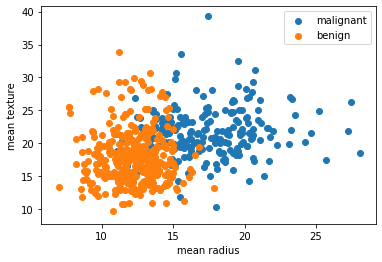

In [1]:
# step1: load data (breast cancer & 2 features), plot pt distributia datelor
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
inputs = data['data']
outputs = data['target']
outputNames = data['target_names']
featureNames = list(data['feature_names'])
feature1 = [feat[featureNames.index('mean radius')] for feat in inputs]
feature2 = [feat[featureNames.index('mean texture')] for feat in inputs]
inputs = [[feat[featureNames.index('mean radius')], feat[featureNames.index('mean texture')]] for feat in inputs]

import matplotlib.pyplot as plt
labels = set(outputs)
noData = len(inputs)
for crtLabel in labels:
    x = [feature1[i] for i in range(noData) if outputs[i] == crtLabel ]
    y = [feature2[i] for i in range(noData) if outputs[i] == crtLabel ]
    plt.scatter(x, y, label = outputNames[crtLabel])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()    

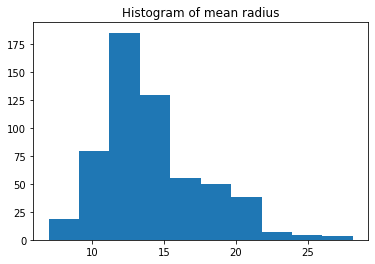

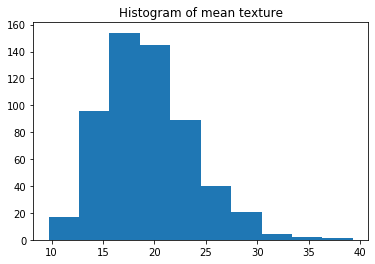

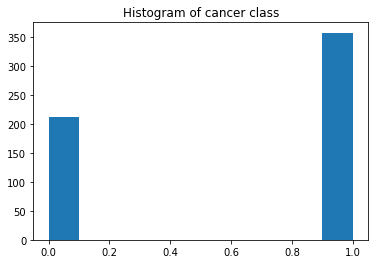

In [2]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

# plot the data distribution
plotDataHistogram(feature1, 'mean radius')
plotDataHistogram(feature2, 'mean texture')
plotDataHistogram(outputs, 'cancer class')

In [3]:
from sklearn.preprocessing import StandardScaler

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData


In [4]:
def plotClassificationData(feature1, feature2, outputs, title = None):
    labels = set(outputs)
    noData = len(feature1)
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if outputs[i] == crtLabel ]
        y = [feature2[i] for i in range(noData) if outputs[i] == crtLabel ]
        plt.scatter(x, y, label = outputNames[crtLabel])
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.legend()
    plt.title(title)
    plt.show()


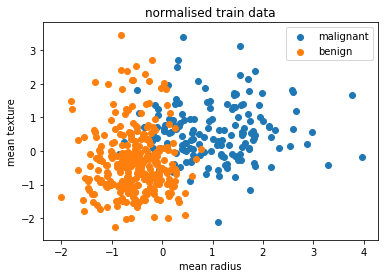

In [5]:
# step2: impartire pe train si test
# step3: normalizare 
import numpy as np

# split data into train and test subsets
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

#normalise the features
trainInputs, testInputs = normalisation(trainInputs, testInputs)

#plot the normalised data
feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]
feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]  

plotClassificationData(feature1train, feature2train, trainOutputs, 'normalised train data')


In [10]:
# step4: invatare model (cu tool linear_model.LogisticRegression() -- [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) -- si cu implementare proprie)


#identify (by training) the classifier

# # using sklearn
# from sklearn import linear_model
# classifier = linear_model.LogisticRegression()

# using developed code
from LogisticRegression import MyLogisticRegression 
# model initialisation
classifier = MyLogisticRegression()

# train the classifier (fit in on the training data)
classifier.fit(trainInputs, trainOutputs)
# parameters of the liniar regressor
w0, w1, w2 = classifier.intercept_, classifier.coef_[0], classifier.coef_[1]
print('classification model: y(feat1, feat2) = ', w0, ' + ', w1, ' * feat1 + ', w2, ' * feat2')
    

classification model: y(feat1, feat2) =  0.9579353512205957  +  -4.446828732086576  * feat1 +  -1.0408997402561482  * feat2


In [11]:
# step5: testare model, plot rezultate, forma outputului si interpretarea lui

# makes predictions for test data
# computedTestOutputs = [w0 + w1 * el[0] + w2 * el[1] for el in testInputs]

# makes predictions for test data (by tool)
computedTestOutputs = classifier.predict(testInputs)


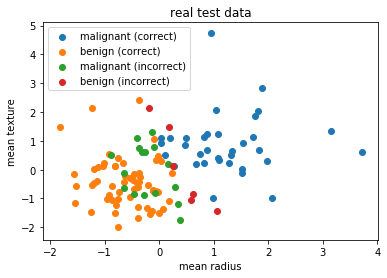

In [12]:

def plotPredictions(feature1, feature2, realOutputs, computedOutputs, title, labelNames):
    labels = list(set(outputs))
    noData = len(feature1)
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] == crtLabel ]
        y = [feature2[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] == crtLabel]
        plt.scatter(x, y, label = labelNames[crtLabel] + ' (correct)')
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] != crtLabel ]
        y = [feature2[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] != crtLabel]
        plt.scatter(x, y, label = labelNames[crtLabel] + ' (incorrect)')
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.legend()
    plt.title(title)
    plt.show()

plotPredictions(feature1test, feature2test, testOutputs, computedTestOutputs, "real test data", outputNames)

In [13]:
# step6: calcul metrici de performanta (acc)

# evalaute the classifier performance
# compute the differences between the predictions and real outputs
# print("acc score: ", classifier.score(testInputs, testOutputs))
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    if (t1 != t2):
        error += 1
error = error / len(testOutputs)
print("classification error (manual): ", error)

from sklearn.metrics import accuracy_score
error = 1 - accuracy_score(testOutputs, computedTestOutputs)
print("classification error (tool): ", error)

classification error (manual):  0.19298245614035087
classification error (tool):  0.19298245614035092
